# Lab 6

By: Maryanne Thangarajah

Link to Github repository: https://github.com/mthangarajah/Labs.git

In [1]:
#Load the packages 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Question 1
Read in both the microarray data (NCI60_data.csv) and the labels of the cancer type (NCI60_labs.csv).

In [2]:
#Read in the microarray data and labels of the cancer type
microarray = pd.read_csv("NCI60_data.csv", index_col = 0)
label_cancer =  pd.read_csv("NCI60_labs.csv")

## Question 2

We will first do a PCA analysis. Scale, perform PCA, and plot the variance explained and the cumulative variance explained by the PCs. How many PCs are produced in the analysis? Approximately how many PCs are required to explain 90% of the variance in the data?

In [3]:
# Create variable to assign standard scaler
scaler = StandardScaler()

#Fit the array 
scaler.fit(microarray)

#Transform the fitted array so every variable has standard deviation of 1
# Assign to a variable
scale_data = scaler.transform(microarray)

In [4]:
#Create variable to preform PCA
pca = PCA()

#Fit the scaled variables to PCA
pca.fit(scale_data)

#Fit the scaled variables to PCA
pca_scores = pca.transform(scale_data)

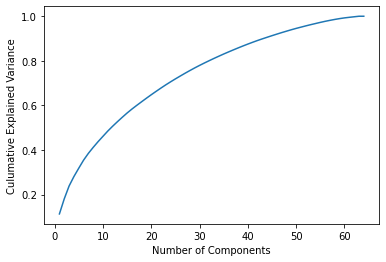

In [5]:
#Number of components for x-axis
components = np.arange(1,65)

#Create a plot of the components on the x-axis and culumative sum of the variance on the y-axis 
# Assign the plot to a variable
x = plt.plot(components,np.cumsum(pca.explained_variance_ratio_))

# Title for x-axis
plt.xlabel("Number of Components")

# Title for y-axis
plt.ylabel("Culumative Explained Variance")

#Show the plot
plt.show()

There are 64 PC produced in the analysis. 
About 44 PCs are required to explain 90% of the variance in the data. 

## Question 3

Plot the scores on the first versus second PC and the scores on the first versus third PC. Color the scores by cancer type. Interpret your results.

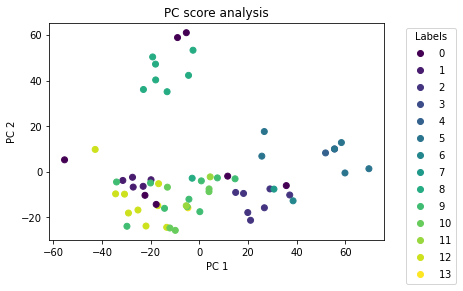

In [35]:
#Labels for the plot
LE = LabelEncoder()

#Scatter plot for scores on the first versus the second with the labels
scatter_plot = plt.scatter(pca_scores[:,0], pca_scores[:,1], c = LE.fit_transform(label_cancer["x"]))


#Re-position the legend of the plot to be outside of the plot
# Add
plt.legend(*scatter_plot.legend_elements(), title="Labels",bbox_to_anchor=(1.05, 1))

# The title of the plot
plt.title("PC score analysis")

#The x-axis title
plt.xlabel('PC 1')

#The y-axis title
plt.ylabel('PC 2')

#Show the plot
plt.show()

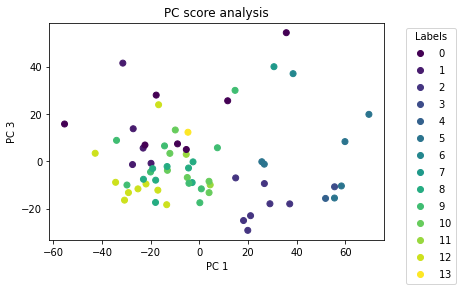

In [34]:
#Scatter plot for scores on the first versus the third with the labels
scatter_plot1 = plt.scatter(pca_scores[:,0], pca_scores[:,3], c = LE.fit_transform(label_cancer["x"]))

#Re-position the legend of the plot to be outside of the plot
# Add
plt.legend(*scatter_plot1.legend_elements(), title="Labels",bbox_to_anchor=(1.05, 1))

# The title of the plot
plt.title("PC score analysis")

#The x-axis title
plt.xlabel('PC 1')

#The y-axis title
plt.ylabel('PC 3')

#Show the plot
plt.show()

Data is randomly distributed for the different labels of cancer. There is no clear cluster for the different types of cancer as all the different types of cancers are scattered throught the PCA score plot.

## Question 4
Next we will perform clustering on the data. Visualize the dendogram for hierarchical clustering with complete, average, and single linkage. Label the dendogram with the cancer types. Does the choice of linkage impact the results?

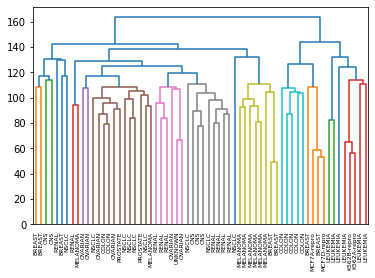

In [9]:
#Clustering using complete linkage
link_complete = linkage(scale_data, 'complete')

#Dendrogram with the linking above and the labels
# The orientation is top down
shc.dendrogram(link_complete,
               labels = list(label_cancer["x"]),
               orientation = "top",
               distance_sort = "descending")

#Show the plot
plt.show()

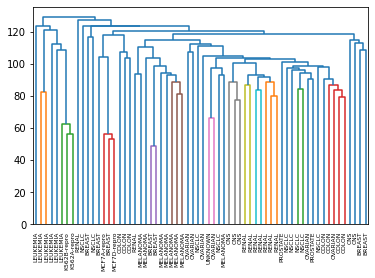

In [10]:
#Clustering using average linkage
link_average = linkage(scale_data, 'average')

#Dendrogram with the linking above and the labels
# The orientation is top down
shc.dendrogram(link_average,
               labels = list(label_cancer["x"]),
               orientation = "top",
               distance_sort = "descending")

#Show the plot
plt.show()

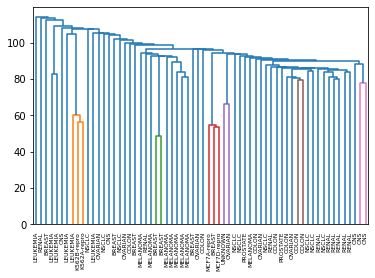

In [12]:
#Clustering using single linkage
link_single = linkage(scale_data, 'single')

#Dendrogram with the linking above and the labels
# The orientation is top down
shc.dendrogram(link_single,
               labels = list(label_cancer["x"]),
               orientation = "top",
               distance_sort = "descending")

#Show the plot
plt.show()

The choice of linkage does impact the results. The complete linkage does a good job in grouping most the cancers that seem alike together compared to average and single linkage.

## Question 5

Use complete linkage for the remainder of the analysis. Cluster the observations into 4 groups. Look at the labels for each of the groups and comment on the success of the clustering.

In [36]:
# Clustering with four clusters and complete linkage
cluster = AgglomerativeClustering(n_clusters=4, linkage='complete')

#Predict Create new variable to predict the y values from the cluster variable above
y_kmeans = cluster.fit_predict(scale_data)

#Create contigency table of results using crosstab of the true y values and the predicted y values
pd.crosstab(label_cancer["x"], y_kmeans, rownames = ["Cancer Labels"], colnames = ["Clusters"])

Clusters,0,1,2,3
Cancer Labels,,,,
BREAST,2,0,2,3
CNS,3,0,0,2
COLON,2,0,5,0
K562A-repro,0,1,0,0
K562B-repro,0,1,0,0
LEUKEMIA,0,6,0,0
MCF7A-repro,0,0,1,0
MCF7D-repro,0,0,1,0
MELANOMA,8,0,0,0


Most of the variables were placed in cluster 0. Some cancer labels such as Melanoma, Ovarian, and Prostate only had variables in cluster 0. In cluster 1, Leukemia was the main cancer label. In cluster 2, some of the cancers were colon, MCF7A-repro and MCF7D-repro. Cluster 3 had few variables, with cancer labels such as breast cancer and CNS. Overall, some of the cancer variables were not clustered together but majority of them were. 

## Question 6

Rather than performing hierarchical clustering on the entire data matrix, we can simply perform hierarchical clustering on the first few principal component score vectors. Sometimes performing clustering on the first few principal component score vectors can give better results than performing clustering on the full data. Perform hierarchical clustering on the first 5 principal component scores and comment on the results.

In [37]:
#Get the first five PC scores
pca_scores_five = pca_scores[:,0:5]

#Predict Create new variable to predict the y values from the cluster variable above (from question 5)
y_kmeans_pca = cluster.fit_predict(pca_scores_five)

#Create contigency table of results using crosstab of the true y values and the predicted y values
pd.crosstab(label_cancer["x"], y_kmeans_pca, rownames = ["Cancer Labels"], colnames = ["Clusters"])

Clusters,0,1,2,3
Cancer Labels,,,,
BREAST,5,0,2,0
CNS,3,0,0,2
COLON,0,0,0,7
K562A-repro,0,1,0,0
K562B-repro,0,1,0,0
LEUKEMIA,0,4,0,2
MCF7A-repro,0,0,1,0
MCF7D-repro,0,0,1,0
MELANOMA,7,0,0,1


The results obtained above are very similar to the clustering methods used in the previous question. Cluster 0 and cluster 3 had most of the cancer labels. Cluster 2 had the fewest number of variables. Some of the clusters had a mix of different cancer variables. For example, cluster 0 and cluster 2 both had breast cancer variables. Overall, the use of PC scores produced similar results to the clustering methods used in question 5. 